## Importing Libraries

In [2]:
##importing libraries
import numpy as np  #for algebraic operations on arrays
import pandas as pd  #for data exploration and manipulation


##plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## Loading the weather data into a Dataframe

1. Using the pandas `read_csv()` method.
2. checking the first few rows using `head()`

In [4]:
data_path = 'weatherAUS.csv'

##loading the dataset into a dataframe
df = pd.read_csv(data_path)

##preview the dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [17]:
##Check for missing values.
df['RainTomorrow'].isnull().sum()
df['RainTomorrow'].value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

In [6]:

##Get number of unique values.
df['RainTomorrow'].nunique()



2

In [7]:
##Get the ratio of frequency distribution of values.
df['RainTomorrow'].value_counts() / len(df)



No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

In [8]:
##Convert yes/no to 1/0.
df.RainTomorrow = (df.RainTomorrow == 'Yes').astype(int)
df.RainTomorrow



0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 145460, dtype: int64

In [10]:
##Segregate categorical variables.
cat_vars = ['object']
cat_df = df.select_dtypes(include=cat_vars)
cat_df.head()



,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No
2,Albury,WSW,W,WSW,No
3,Albury,NE,SE,E,No
4,Albury,W,ENE,NW,No


In [11]:
##Define cardinality of variables.
for var in list(cat_df.columns):
    print(var, 'has', len(cat_df[var].unique()), 'labels')


Location has 49 labels
WindGustDir has 17 labels
WindDir9am has 17 labels
WindDir3pm has 17 labels
RainToday has 3 labels


In [12]:

##Format date column to datetime data type.
df['Date'] = pd.to_datetime(df['Date'])


In [13]:

##Check datat  info again.
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [14]:
##Extract the year from date.
df['Year'] = df['Date'].dt.year
df['Year'].head()



0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [15]:
##Create the correlation matrix.
corr = df.corr()


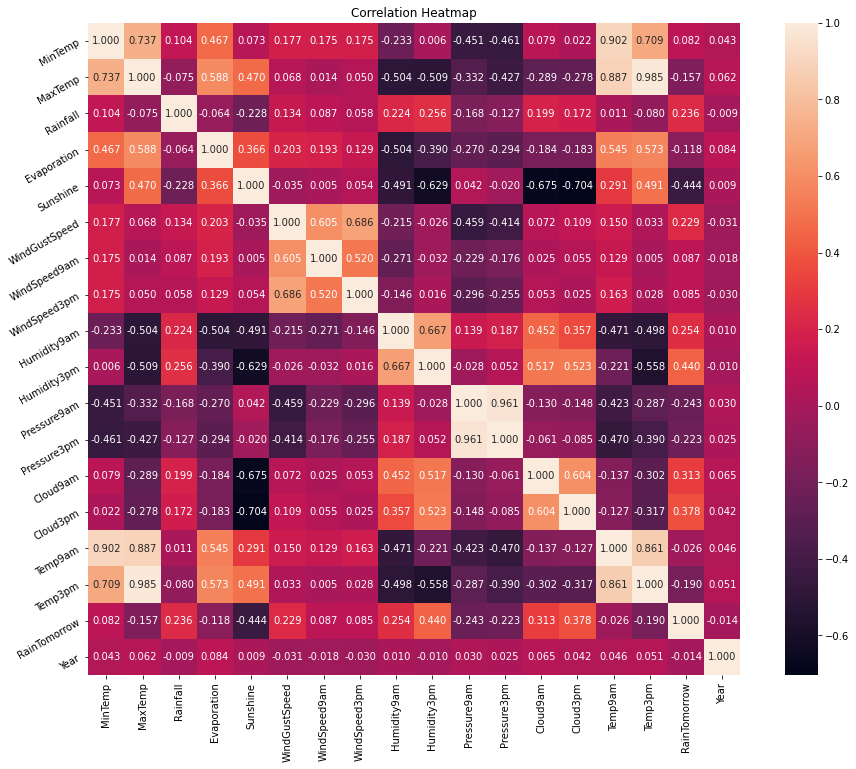

In [16]:

##Plot correlation matrix.
plt.figure(figsize=(16,12))
ax = sns.heatmap(corr, 
                 annot=True,
                 square=True,
                 fmt='.3f',
                 linecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.title('Correlation Heatmap')
plt.show()